In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lec_act_9_simulation.ipynb")

# Iterative systems part II

This is a continuation/extension of week 5's simulation with some slight modifications (Week_5_systems/c_tutorial_iterative_systems.ipynb)


- Full 2D - position and velocity of a point in space
- Integrate velocity as well as position

Slides: https://docs.google.com/presentation/d/1ruu1Lq9MpYSHiVa5RNrvyxap4yXpTpiXf_VTzHKAFb8/edit?usp=sharing

Code structure: I've broken the code up in to several pieces: Code that is shared across the lecture activity, lab, and homework is in **pinball_routines.py**. Code that is specific to just the one assignment (running the simulation, plotting) is in the JN.

In [2]:
# The usual imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# These commands will force JN to actually re-load the external file when you re-execute the import command
%load_ext autoreload
%autoreload 2

In [4]:
# Do the import of your pinball routines
# 
from pinball_routines import acceleration_due_to_gravity, compute_next_step

# One time step
TODO Compute one time step of the simulation (edit **compute_next_step** in pinball_routines.py)

In [5]:
# Time step
delta_t = 0.1

starting_state = np.zeros((3, 2))  # meters
starting_state[0, :] = [0, 0] # Start at zero, zero
# Velocity - mostly up with a bit of x 
starting_state[1, :] = [-0.25, 5.0]
# Acceleration is really boring
starting_state[2, :] = [0.0, acceleration_due_to_gravity()]

first_time_step = compute_next_step(starting_state, delta_t=delta_t)
print(f"Checking first time step {first_time_step}")

assert(np.all(np.isclose(first_time_step[0, :], starting_state[0, :] + delta_t * starting_state[1, :])))
assert(np.all(np.isclose(first_time_step[1, :], starting_state[1, :] + delta_t * starting_state[2, :])))

Checking first time step [[-0.025  0.5  ]
 [-0.25   4.02 ]
 [ 0.    -9.8  ]]


In [6]:
grader.check("compute_next_time_step")

compute_next_time_step results: All test cases passed!

# Simulation

Note that you could use either the number of time steps OR total time for the last parameter

Timesteps is a bit safer because at least you know it will only go for so many time steps...

In this activity we'll just loop over n time steps; we'll do something "smarter" in the lab

TODO: Fill in ret_pose_all

In [7]:
# EXAMPLE CODE
# See Iterate n times in Lab 5 ODE systems for an example of how to store values in an array during a simulation time step

# If you have a 2 x n array this works
new_xy = np.array([0.1, 0.2])

array_to_store_in = np.zeros((2, 10))

# Copies both x and y into the first column of array_to_store_in
array_to_store_in[:, 0] = new_xy

next_xy = np.array([0.3, 0.4])
# ... and into the second column
array_to_store_in[:, 1] = new_xy


In [8]:
def calculate_n_time_steps(starting_state, delta_t=0.1, n_time_steps=100):
    """ Call compute one time step multiple times and store it in a numpy array
    @param starting_state - the starting positino, velocity, acceleration
    @param delta_t - the time step to use. Define a default t value that you've determined works well
    @param n_time_steps - how many time steps to take. Again, default to a reasonable number
    @return position values as a 2xtimesteps numpy array
    """

    # The returned array. We know the size, so we can pre-allocate it
    ret_pose_all = np.zeros((2, n_time_steps))

    # TODO: for the given number of time steps, call compute_next_step and save the position
    # Note: compute_next_step is in pinball_routines.py
    current_state = starting_state
    for t in range(n_time_steps):
        ret_pose_all[:, t] = current_state[0, :]
        current_state = compute_next_step(current_state, delta_t)
    # All done - return the numpy array
    return ret_pose_all

In [9]:
# Actually run the simulation
# Time step

ret_poses = calculate_n_time_steps(starting_state, delta_t=delta_t, n_time_steps=15)
print(f"Last pose: {ret_poses[:, -1]}")
assert(np.isclose(ret_poses[0, -1], -0.35))
assert(np.isclose(ret_poses[1, -1], -1.918))
print(f"{ret_poses}")

Last pose: [-0.35  -1.918]
[[ 0.    -0.025 -0.05  -0.075 -0.1   -0.125 -0.15  -0.175 -0.2   -0.225
  -0.25  -0.275 -0.3   -0.325 -0.35 ]
 [ 0.     0.5    0.902  1.206  1.412  1.52   1.53   1.442  1.256  0.972
   0.59   0.11  -0.468 -1.144 -1.918]]


In [10]:
grader.check("simulate")

simulate results: All test cases passed!

# Plotted result

TODO: Change delta t and number of time steps so the spacing is closer together and the simulation is stopped shortly after the ball passes the y = 0 line (we'll do this "right" in the lab)

In [11]:
# This is pretty arbitrary - but I chose to ask the person calling the function to pass in the poses returned from
#  the interation and the initial velocity (so we can see it).
def plot_results(axs, ret_poses, initial_vel, total_time):
    """ plot the results of running the system AND the "correct" closed form result
    @param ret_poses - x y position values in a 2xn numpy array
    @param initial_vel - Show the initial velocity
    @param total_time - the total time the system ran (for closed form solution, delta_t * n time steps)
    @return Nothing
    """
    # The values we calculated in calculate_n_time_steps
    axs.plot((ret_poses[0, 0], ret_poses[0, 0] + initial_vel[0]),
             (ret_poses[1, 0], ret_poses[1, 0] + initial_vel[1]),
             '-m', label="Initial vel")
    axs.plot(ret_poses[0, 0], ret_poses[1, 0], 'xr', markersize=10, label="Start")
    axs.plot(ret_poses[0, :], ret_poses[1, :], '-Xk', label="Poses")

    axs.axis('equal')
    axs.set_title(f"Path of pinball, 0-{total_time} s")
    axs.legend()

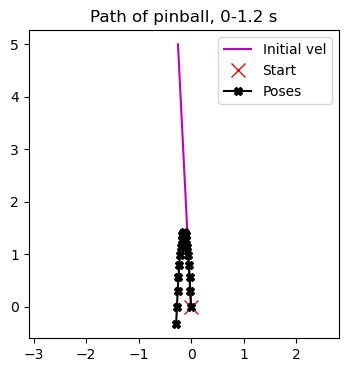

In [12]:
nrows = 1
ncols = 1
fig, axs = plt.subplots(nrows, ncols, figsize=(4, 4))

# TODO change delta_t and n_time_steps so the simulation ends shortly after it crosses the y = 0 line
#   You will need to over-ride the default parameters for delta t and n time steps
n_time_steps = 20
delta_t = 0.06

ret_poses_stopped = calculate_n_time_steps(starting_state, delta_t=delta_t, n_time_steps=n_time_steps)

# TODO Fix this so that you pass the remaining correct variables (replace each _ with the correct variable)

plot_results(axs, ret_poses_stopped, starting_state[1, :], n_time_steps*delta_t)

In [13]:
grader.check("Plot")

Plot results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [14]:

# List of names (creates a set)
worked_with_names = {"N/A"}
# List of URLS I25 (creates a set)
websites = {"N/A"}
# Approximate number of hours, including lab/in-class time
hours = 0.5

In [15]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

### To submit

Double check your plots. Don't forget **pinball_routines.py**. We will include **matrix_routines.py**; but it won't hurt if you include it as well.

- Submit this .ipynb file  and pinball_routines.py to lecture activity 9 (simulate)

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

Failures: See above for files to include.